In [1]:
import pandas as pd #'0.24.2'
import numpy  as np #'1.16.4'

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#understanding the dataset
print(df.head())
print('\nUnique Ids: ', len(pd.unique(df['ID'])))
print('\nNan Values: '), print(df.isnull().sum())


            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106

Unique Ids:  24

Nan Values: 
ID            0
Date          0
Element       0
Data_Value    0
dtype: int64


(None, None)

In [2]:
df = df.set_index('Date').sort_index()

In [3]:
#extract the information from 2005 to 2014
dfp = df['2005-01-01':'2014-12-31']
dfp = dfp.groupby(lambda x: x[-5:])['Data_Value'].agg([('TMAX', np.max), ('TMIN', np.min), ('TAVG', np.average)])/10.0
dfp.index = dfp.index.map(lambda x: '2000-' + x)
dfp.index = pd.to_datetime(dfp.index)
dfp.head()

,TMAX,TMIN,TAVG
2000-01-01,15.6,-16.0,-0.785101
2000-01-02,13.9,-26.7,-3.305728
2000-01-03,13.3,-26.7,-5.192857
2000-01-04,10.6,-26.1,-3.455663
2000-01-05,12.8,-15.0,-1.905301


In [4]:
#extract information from 2015
df3 = df['2015-01-01':]
df3 = df3.groupby(df3.index)['Data_Value'].agg([('TMAX-2015', np.max), ('TMIN-2015', np.min)])/10.0
df3.index = df3.index.map(lambda x: '2000' + x[4:])
df3.index = pd.to_datetime(df3.index)
df3.head()

,TMAX-2015,TMIN-2015
Date,,
2000-01-01,1.1,-13.3
2000-01-02,3.9,-12.2
2000-01-03,3.9,-6.7
2000-01-04,4.4,-8.8
2000-01-05,2.8,-15.5


In [5]:
#build relation between 2015 and 2005-2014 data
df4 = dfp.merge(df3, left_index=True, right_index=True)
recordmax = df4.loc[df4['TMAX-2015']>df4['TMAX'], 'TMAX-2015']
recordmin = df4.loc[df4['TMIN-2015']<df4['TMIN'], 'TMIN-2015']

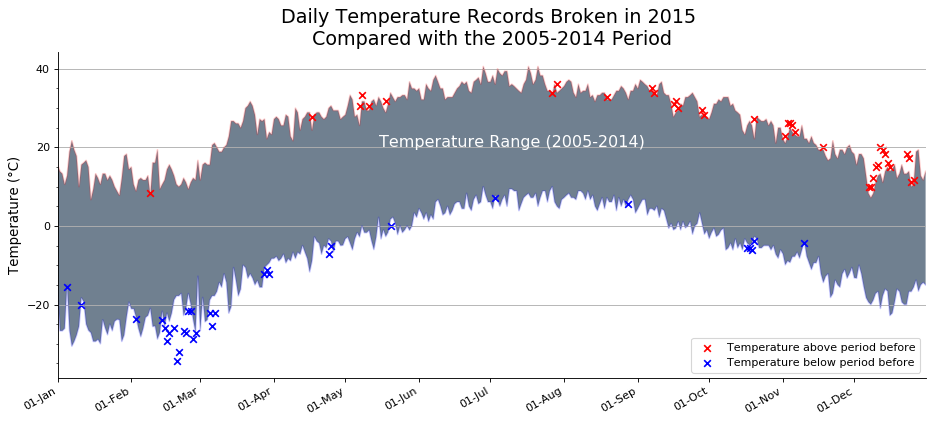

In [13]:
#plot results
import matplotlib.pyplot as plt   #'3.1.0'
import matplotlib.dates as mdates
#plot initialization 
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.add_subplot(111)
#plot lines
ax.plot(dfp['TMAX'], 'r', alpha=0.2)
ax.plot(dfp['TMIN'], 'b', alpha=0.2)
ax.fill_between(dfp.index, dfp['TMIN'], dfp['TMAX'], facecolor='slategrey')

#plot points
ax.scatter(recordmax.index.values, recordmax, marker='x', c='red',  label='Temperature above period before')
ax.scatter(recordmin.index.values, recordmin, marker='x', c='blue', label='Temperature below period before')

#config ticks
plt.yticks(np.arange(-40, 50, step=20)[1:])
plt.minorticks_on()

#config x axis tick labels
months = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%d-%b')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(fmt)
ax.set_xlim(np.datetime64('2000-01-01', 'D'), np.datetime64('2000-12-31', 'D'))

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%d-%b')
#ax.format_ydata = lambda x: x  

#clear borders
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)

#titles, labels and legends
plt.title('Daily Temperature Records Broken in 2015 \nCompared with the 2005-2014 Period', fontsize='xx-large')
plt.ylabel('Temperature (°C)', fontsize='large')
ax.legend(loc=4)
ax.text('2000-05-15', 20, 'Temperature Range (2005-2014)', fontsize='x-large', c='white')

ax.grid(True, axis='y')
fig.autofmt_xdate()

plt.savefig('output.jpg', bbox_inches='tight')